# **机器学习-银行分析**

---

### 物联网22-1班第六组
通过建立预测模型，利用客户的个人信息和银行交互特征等数据，来预测客户是否会对银行的定期存款产品感兴趣。这有助于银行更好地了解客户需求，有针对性地进行营销活动。主要步骤有：
1. 导入包
2. 数据预处理
3. 模型训练与评估
4. 各模型表现比较

## 导入常用模块 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

数据集链接$~~$  https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets/data 

## 数据预处理

**读取数据部分（慕语涵）**

In [3]:
data = pd.read_csv('bank.csv',sep=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


从数据的信息可以看出，数据中无缺失数据，共有4521条数据
<br/>int64:64位整数数据类型，objectt:字符串
<br/>最后一个特征y为预测目标，即该客户是否会在银行进行定期存款

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


分析数值型数据的计数、平均值、标准差、最小值、25%、50%（中位数）和75%分位数以及最大值


In [5]:
# describe只返回数值型数据的统计
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


**婚姻状况分析（青灵言）**

In [6]:
# 将分类列当作对象类型处理，可以看到统计数量
data['marital'].describe()

count        4521
unique          3
top       married
freq         2797
Name: marital, dtype: object

In [7]:
# 婚姻状态列中的所有唯一值
data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [8]:
# 每个婚姻状态及其出现的次数
data['marital'].value_counts()

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

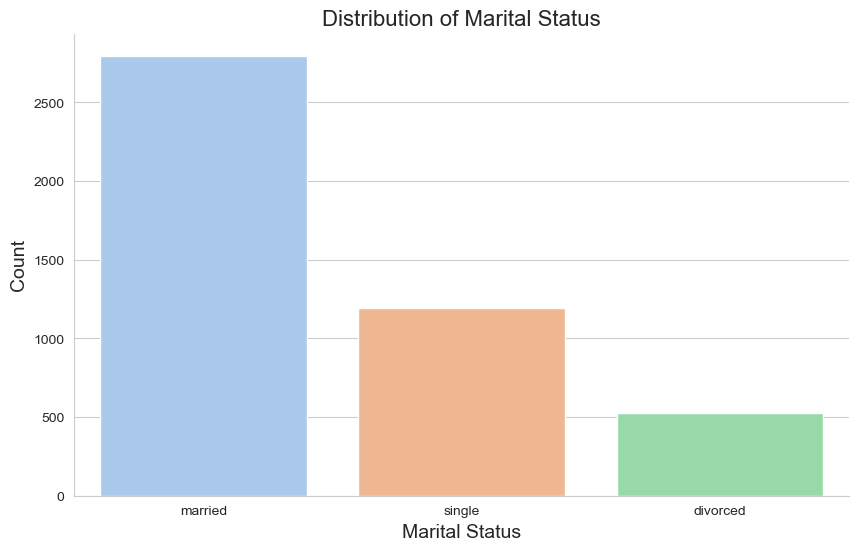

In [9]:
#绘制婚姻状况技术图
# 设置seaborn风格
sns.set_style("whitegrid")

# 创建一个10x6英寸大小的图像
plt.figure(figsize=(10, 6))

# 绘制婚姻状况计数图
sns.countplot(data=data, x="marital", palette="pastel")

# 添加轴标签和标题，并设置字体大小
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Marital Status', fontsize=16)

# 去除边框
sns.despine()

# 显示图形
plt.show()

**教育状况分析（刘琪）**

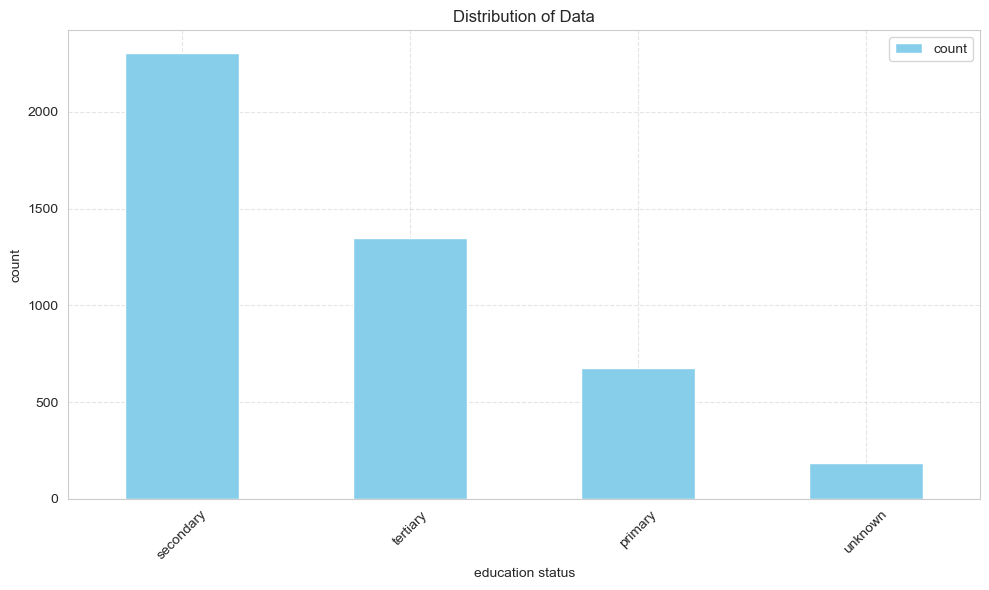

In [10]:
ed = data['education'].value_counts()
ed.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Distribution of Data')  # 设置标题
plt.xlabel('education status')  # 设置X轴标签
plt.ylabel('count')  # 设置Y轴标签
plt.xticks(rotation=45)  # 设置X轴刻度的旋转角度
plt.grid(True, linestyle='--', alpha=0.5)  # 添加网格线
plt.legend(loc='upper right')  # 设置图例位置
plt.tight_layout()  # 调整布局，避免重叠
plt.show()

**年龄分布分析（李想）**

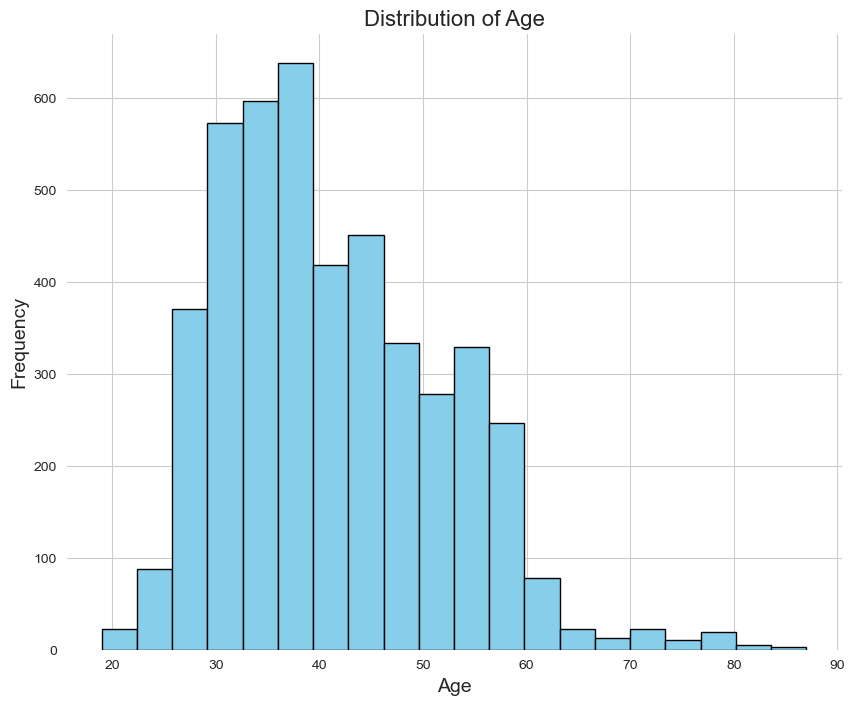

In [11]:
#展示年龄的分布
sns.set_style("whitegrid")

# 创建一个10x8英寸大小的图像
plt.figure(figsize=(10, 8))

# 绘制年龄分布直方图
plt.hist(data['age'], color='skyblue', edgecolor='black', bins=20)

# 添加轴标签和标题，并设置字体大小
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Age', fontsize=16)

# 去除边框
plt.box(False)

# 显示图形
plt.show()

**将非数值型数据转为数值型数据（慕语涵）**

In [12]:
# 查看数据集前五行
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


将数据集中（'y', 'default', 'housing', 'loan'）列中的字符串值（'yes' 和 'no'）替换为数值（1 和 0）

In [13]:
# 定义替换规则  
replacements = {  
    'y': {'yes': 1, 'no': 0},  
    'default': {'yes': 1, 'no': 0},  
    'housing': {'yes': 1, 'no': 0},  
    'loan': {'yes': 1, 'no': 0}  
}  
  
# 使用 replace() 方法，并传递一个字典，其中包含要替换的列和对应的替换规则  
for col, rule in replacements.items():  
    data[col] = data[col].replace(rule)  
  
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,feb,129,4,211,3,other,0


**对 education 进行分级（慕语涵）**
<br/>tertiary = 3
<br/>secondary = 2
<br/>primary = 1
<br/>unknown = 0

In [14]:
def encode_edu_attr(data):
    for i in education:
        data.loc[data[i] == 'tertiary', i] = 3
        data.loc[data[i] == 'secondary', i] = 2
        data.loc[data[i] == 'primary', i] = 1
        data.loc[data[i] == 'unknown', i] = 0
    return data
education =['education']

encode_edu_attr(data)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,1,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,2,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,3,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,3,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,2,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,2,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,3,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,2,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,2,0,1137,0,0,cellular,6,feb,129,4,211,3,other,0


**将分类变量进行独热编码（One-Hot Encoding）（慕语涵）**

In [15]:
cate_attrs =['job','marital','education','month','contact','poutcome']
def encode_cate_attrs(data,cate_attrs):
    data = encode_edu_attr(data)
    cate_attrs.remove('education')
    for i in cate_attrs:
        dummies_df = pd.get_dummies(data[i])
        dummies_df = dummies_df.rename(columns = lambda x: i+'_'+str(x))
        data = pd.concat([data,dummies_df],axis = 1)
        data = data.drop(i,axis=1)
    return data
data2 = encode_cate_attrs(data,cate_attrs)
data2  

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_nov,month_oct,month_sep,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1,0,1787,0,0,19,79,1,-1,...,False,True,False,True,False,False,False,False,False,True
1,33,2,0,4789,1,1,11,220,1,339,...,False,False,False,True,False,False,True,False,False,False
2,35,3,0,1350,1,0,16,185,1,330,...,False,False,False,True,False,False,True,False,False,False
3,30,3,0,1476,1,1,3,199,4,-1,...,False,False,False,False,False,True,False,False,False,True
4,59,2,0,0,1,0,5,226,1,-1,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,2,0,-333,1,0,30,329,5,-1,...,False,False,False,True,False,False,False,False,False,True
4517,57,3,1,-3313,1,1,9,153,1,-1,...,False,False,False,False,False,True,False,False,False,True
4518,57,2,0,295,0,0,19,151,11,-1,...,False,False,False,True,False,False,False,False,False,True
4519,28,2,0,1137,0,0,6,129,4,211,...,False,False,False,True,False,False,False,True,False,False


**X 表示特征，而 y 代表目标变量**

In [16]:
X = data2.iloc[:,:-1].values
y = data2.iloc[:,-1].values.astype('int8')
# X 包含了除最后一列之外的所有数据，y 是表格最后一列的数据，并且被转换为了 int8 数据类型。

X,y

(array([[30, 1, 0, ..., False, False, False],
        [33, 2, 0, ..., True, False, False],
        [35, 3, 0, ..., True, False, False],
        ...,
        [57, 2, 0, ..., False, False, False],
        [28, 2, 0, ..., False, True, False],
        [44, 3, 0, ..., False, True, False]], dtype=object),
 array([1, 0, 0, ..., 1, 0, 0], dtype=int8))

## 模型训练与评估

**从sklearn库中导入预处理、分类器和评估指标的模块**

In [33]:
# 用于划分数据集
from sklearn.model_selection import train_test_split
# 用于特征标准化
from sklearn.preprocessing import StandardScaler

#随机森林
from sklearn.ensemble import RandomForestClassifier
#逻辑回归
from sklearn.linear_model import LogisticRegression
#朴素贝叶斯
from sklearn.naive_bayes import GaussianNB
#SVM 
from sklearn.svm import SVC
#KNN
from sklearn.neighbors import KNeighborsClassifier
#决策树
from sklearn.tree import DecisionTreeClassifier

# 用于评估分类模型的性能
from sklearn.metrics import accuracy_score, f1_score, recall_score,confusion_matrix


**用 train_test_split 函数将数据划分为训练集和测试集**
<br/>X_train：训练集
<br/>X_test：测试集
<br/>y_train：训练集对应的标签
<br/>y_test：测试集对应的标签
<br/>测试集的大小：默认将 25% 的数据作为测试集

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

**逻辑回归模型（卢思颖）**

In [35]:

scaler = StandardScaler()
# 对训练数据X_train进行拟合并转换，使其标准化
X_train_scaled = scaler.fit_transform(X_train)
# 对测试数据X_test进行相同的标准化转换
X_test_scaled = scaler.transform(X_test)

# 逻辑回归模型
lf = LogisticRegression(max_iter=1000)  # 增加迭代次数以避免收敛警告
lf.fit(X_train_scaled, y_train)
y_test_pred_lf = lf.predict(X_test_scaled)

# 评估
cm = confusion_matrix(y_test, y_test_pred_lf)
accuracy = accuracy_score(y_test, y_test_pred_lf)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)



Confusion Matrix:
 [[202   0]
 [  0 929]]
Accuracy: 1.0


**朴素贝叶斯（卢思颖）**

In [36]:
# 创建高斯朴素贝叶斯分类器对象
nb = GaussianNB()
# 训练模型
nb.fit(X_train_scaled, y_train)
# 评估模型
print("Naive Bayes Accuracy:", nb.score(X_test_scaled, y_test))

Naive Bayes Accuracy: 0.9991158267020336


**支持向量机（李想）**

In [37]:
# 创建SVM分类器对象：
svm = SVC()
# 训练模型
svm.fit(X_train_scaled, y_train)
# 评估模型
print("SVM Accuracy:", svm.score(X_test_scaled, y_test))

SVM Accuracy: 0.9973474801061007


**随机森林分类器（刘琪）**

In [38]:
# 创建随机森林分类器对象
rf = RandomForestClassifier()
# 训练模型
rf.fit(X_train_scaled, y_train)
# 评估模型
print("Random Forest Accuracy:", rf.score(X_test_scaled, y_test))

Random Forest Accuracy: 1.0


**K最近邻（青灵言）**

In [39]:
# 创建KNN分类器对象
knn = KNeighborsClassifier()
# 训练模型
knn.fit(X_train_scaled, y_train)
# 评估模型
print("KNN Accuracy:", knn.score(X_test_scaled, y_test))

KNN Accuracy: 0.9655172413793104


**决策树分类器（慕语涵）**

In [40]:
# 创建决策树分类器对象 
dt = DecisionTreeClassifier()
# 训练模型
dt.fit(X_train_scaled, y_train)
# 评估模型
print("Decision Tree Accuracy:", dt.score(X_test_scaled, y_test))

Decision Tree Accuracy: 1.0


**随机森林分类器ROC曲线（刘琪）**

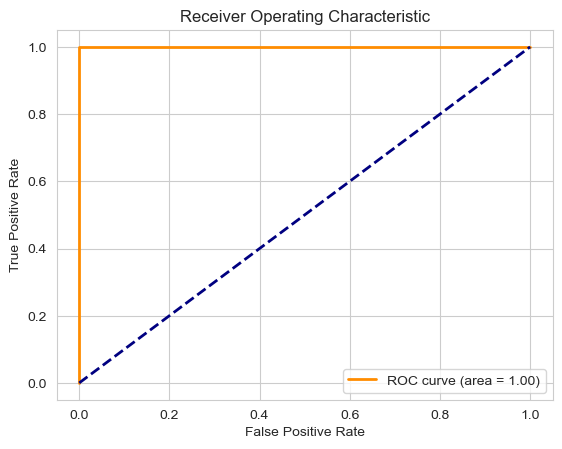

In [43]:
from sklearn.metrics import roc_curve, auc

#模型比较图 ROC
probabilities = rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probabilities, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**精度-召回曲线（李想）**

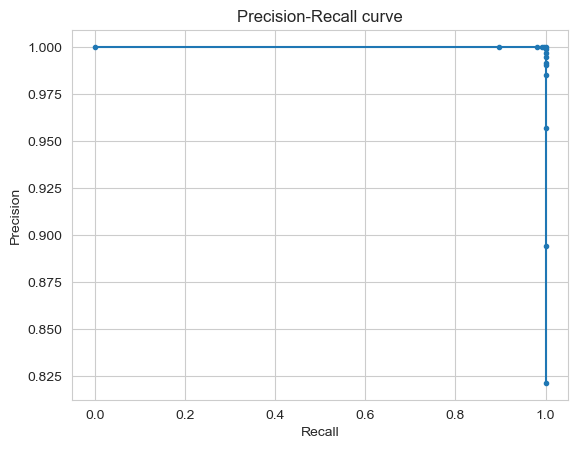

In [44]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, _ = precision_recall_curve(y_test, probabilities)
plt.figure()
plt.plot(recalls, precisions, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()


**模型表现比较并可视化方法1（青灵言）**

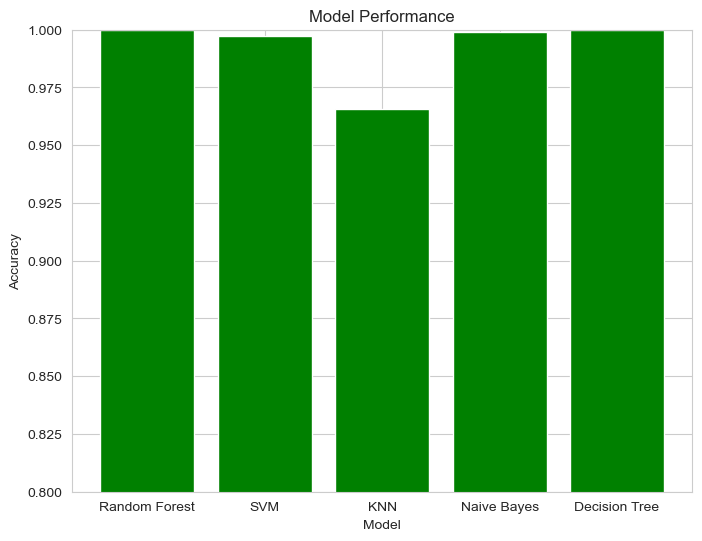

In [46]:
models = ['Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'Decision Tree']
accuracies = [rf.score(X_test_scaled, y_test), svm.score(X_test_scaled, y_test),
              knn.score(X_test_scaled, y_test), nb.score(X_test_scaled, y_test),
              dt.score(X_test_scaled, y_test)]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color='green')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance')
plt.ylim([0.8, 1])
plt.show()
#模型比较图


**模型表现比较并可视化方法2（卢思颖）**

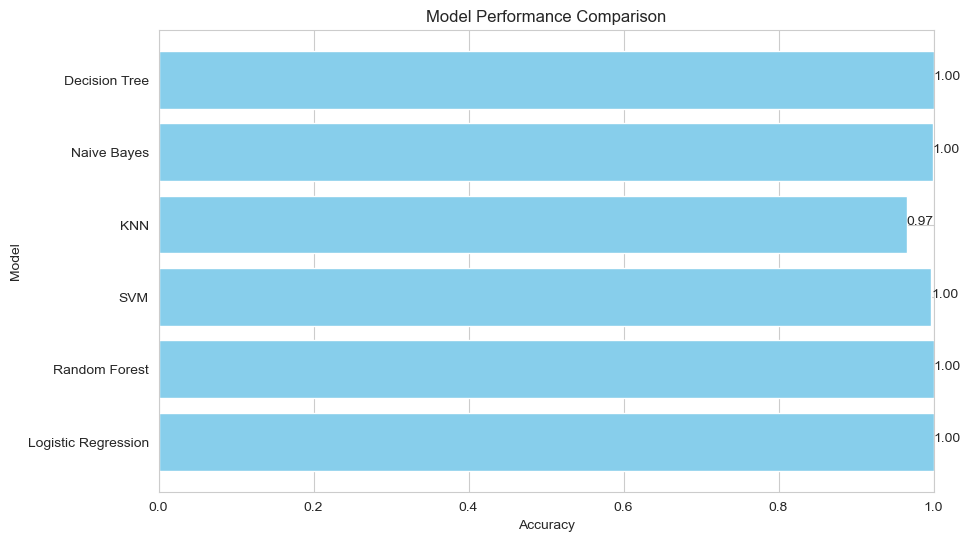

In [47]:
# 模型准确率
accuracies = {
    'Logistic Regression': accuracy,
    'Random Forest': rf.score(X_test_scaled, y_test),
    'SVM': svm.score(X_test_scaled, y_test),
    'KNN': knn.score(X_test_scaled, y_test),
    'Naive Bayes': nb.score(X_test_scaled, y_test),
    'Decision Tree': dt.score(X_test_scaled, y_test)
}

# 创建条形图
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Performance Comparison')
plt.xlim([0, 1])  # 设置x轴的范围为0到1
for index, value in enumerate(accuracies.values()):
    plt.text(value, index, f'{value:.2f}')
plt.show()